# Diabetes Prediction

In [1]:
#pip install scikit-optimize


In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


---

## Exploring the Dataset

In [3]:
# load the data
rawDF = pd.read_csv("diabetesData.csv")

rawDF.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
rawDF.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
rawDF['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

---

### Imputing Missing Values 

In [6]:
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the gender col is 0
The number of na values in the age col is 0
The number of na values in the hypertension col is 0
The number of na values in the heart_disease col is 0
The number of na values in the smoking_history col is 0
The number of na values in the bmi col is 0
The number of na values in the HbA1c_level col is 0
The number of na values in the blood_glucose_level col is 0
The number of na values in the diabetes col is 0


In [7]:
for col in rawDF:
    naCount = (rawDF[col]=='No Info').sum()
    print(f"The number of No Info in the {col} col is {naCount}")

The number of No Info in the gender col is 0
The number of No Info in the age col is 0
The number of No Info in the hypertension col is 0
The number of No Info in the heart_disease col is 0
The number of No Info in the smoking_history col is 35816
The number of No Info in the bmi col is 0
The number of No Info in the HbA1c_level col is 0
The number of No Info in the blood_glucose_level col is 0
The number of No Info in the diabetes col is 0


In [8]:
smokingGroup = rawDF.groupby('smoking_history').size()
smokingGroup

smoking_history
No Info        35816
current         9286
ever            4004
former          9352
never          35095
not current     6447
dtype: int64

In [9]:
rawDF.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [10]:
# Calculate the distribution of the known values
distribution = rawDF[rawDF['smoking_history'] != 'No Info']['smoking_history'].value_counts(normalize=True)

# Impute 'No Info' based on distribution
no_info_indices = rawDF[rawDF['smoking_history'] == 'No Info'].index
imputed_values = np.random.choice(distribution.index, size=len(no_info_indices), p=distribution.values)
rawDF.loc[no_info_indices, 'smoking_history'] = imputed_values


In [11]:
for col in rawDF:
    naCount = (rawDF[col]=='No Info').sum()
    print(f"The number of No Info in the {col} col is {naCount}")

The number of No Info in the gender col is 0
The number of No Info in the age col is 0
The number of No Info in the hypertension col is 0
The number of No Info in the heart_disease col is 0
The number of No Info in the smoking_history col is 0
The number of No Info in the bmi col is 0
The number of No Info in the HbA1c_level col is 0
The number of No Info in the blood_glucose_level col is 0
The number of No Info in the diabetes col is 0


In [12]:
newSmokingGroup = rawDF.groupby('smoking_history').size()
newSmokingGroup

smoking_history
current        14425
ever            6321
former         14514
never          54681
not current    10059
dtype: int64

In [13]:
genderGroup = rawDF.groupby('gender').size()
genderGroup

gender
Female    58552
Male      41430
Other        18
dtype: int64

In [14]:
# Assuming 'gender' is the column name and df is your DataFrame
# Calculate the distribution of the known values
distribution = rawDF['gender'].value_counts(normalize=True)

# Assuming df['gender'] has some NaN values that need to be imputed
missing_indices = rawDF[rawDF['gender'] == 'Other'].index
imputed_genders = np.random.choice(distribution.index, size=len(missing_indices), p=distribution.values)
rawDF.loc[missing_indices, 'gender'] = imputed_genders


In [15]:
newGenderGroup = rawDF.groupby('gender').size()
newGenderGroup

gender
Female    58561
Male      41439
dtype: int64

In [16]:
progressDF = rawDF
progressDF.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,never,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [17]:
progressDF.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,never,27.32,6.2,90,0
99996,Female,2.0,0,0,current,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


---

### Categorical Visualizations

In [18]:
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")

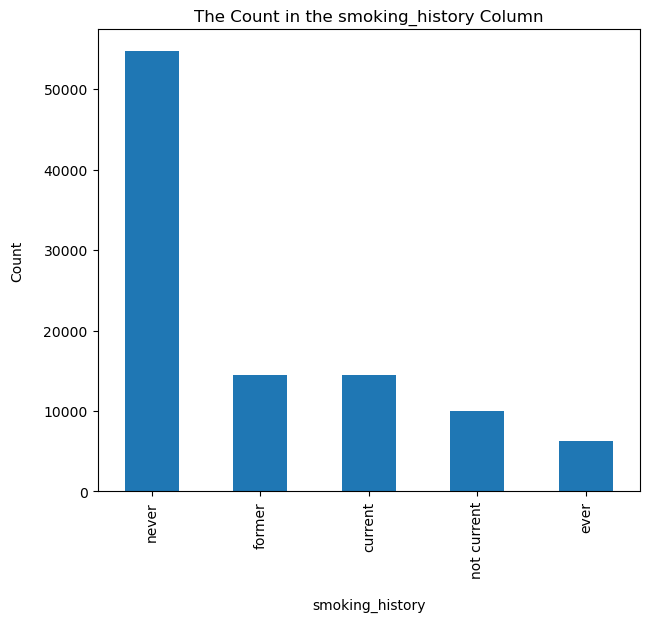

In [19]:
makeBarValueCount(progressDF, 'smoking_history')

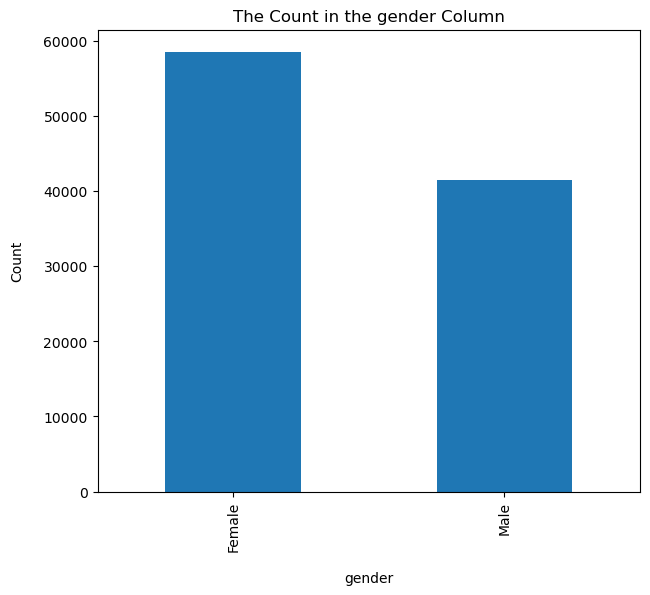

In [20]:
makeBarValueCount(progressDF, 'gender')

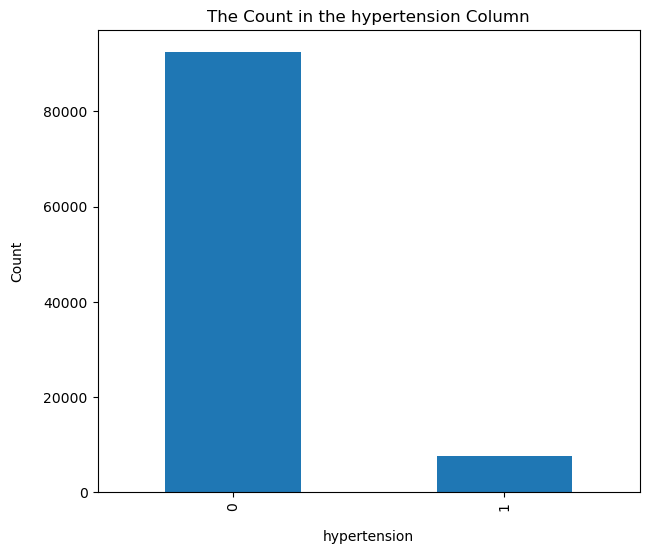

In [21]:
makeBarValueCount(progressDF, 'hypertension')

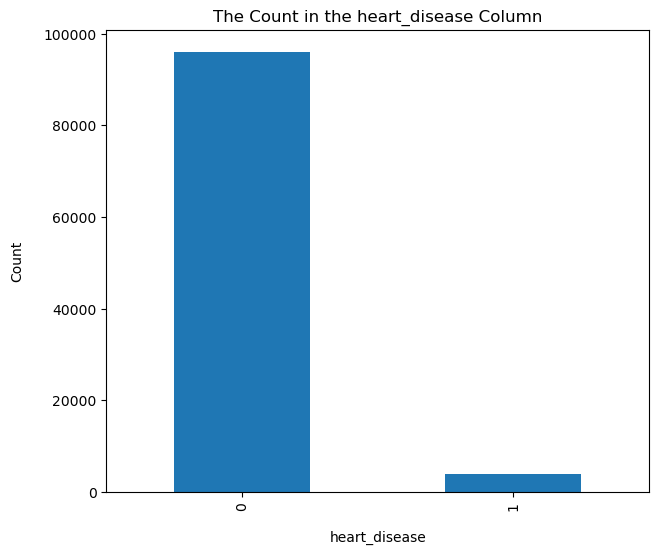

In [22]:
makeBarValueCount(progressDF, 'heart_disease')

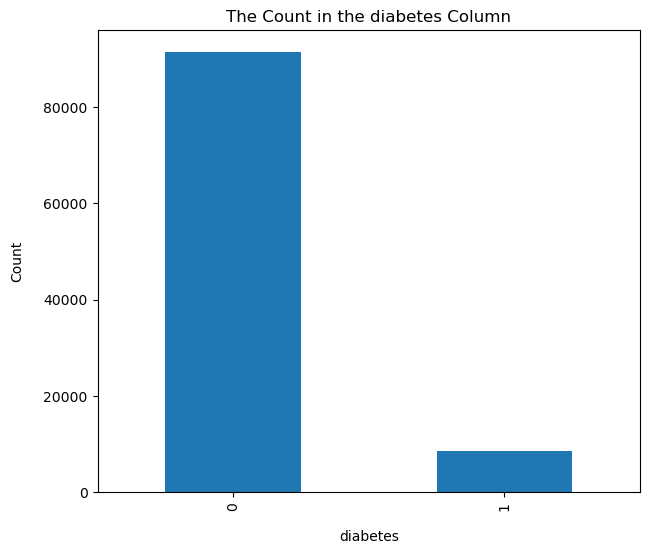

In [23]:
makeBarValueCount(progressDF,'diabetes')

---

### Numerical Visualizations

In [24]:
def makeHistValueCount(aDF, colName):
    aDF[colName].plot(kind='hist', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")


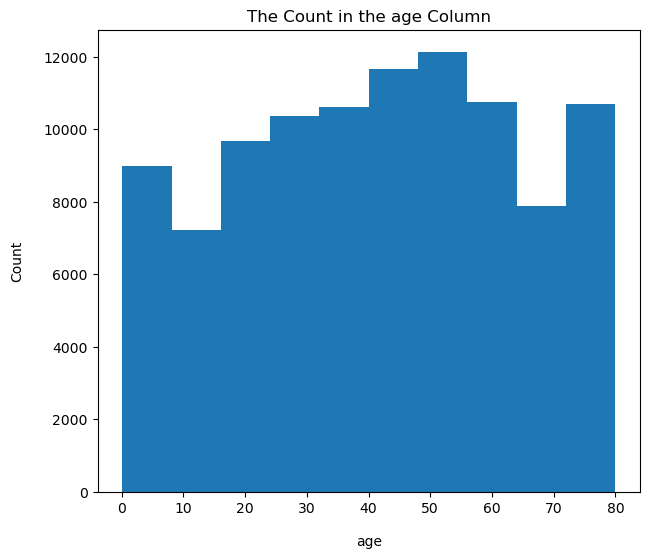

In [25]:
makeHistValueCount(progressDF, 'age')

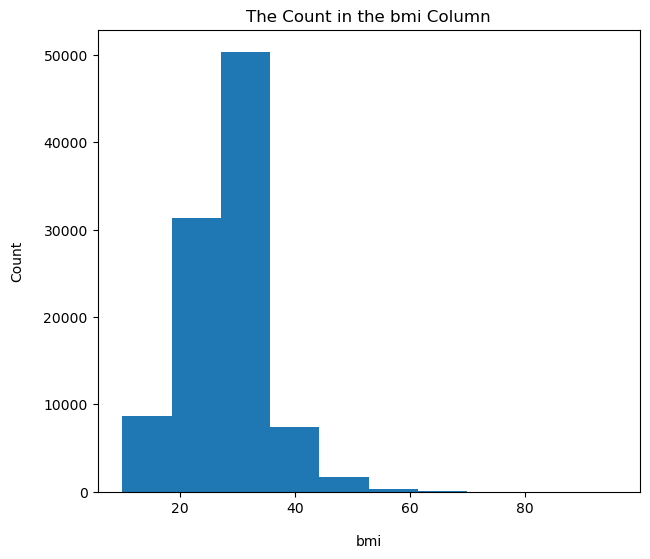

In [26]:
makeHistValueCount(progressDF, 'bmi')

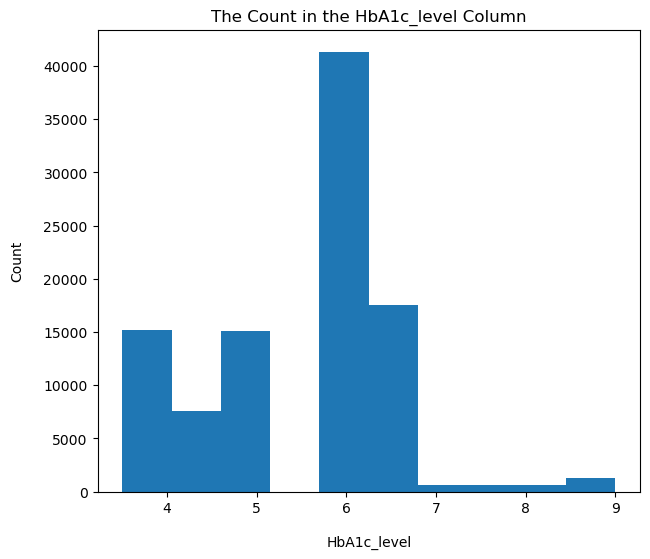

In [27]:
makeHistValueCount(progressDF, 'HbA1c_level')

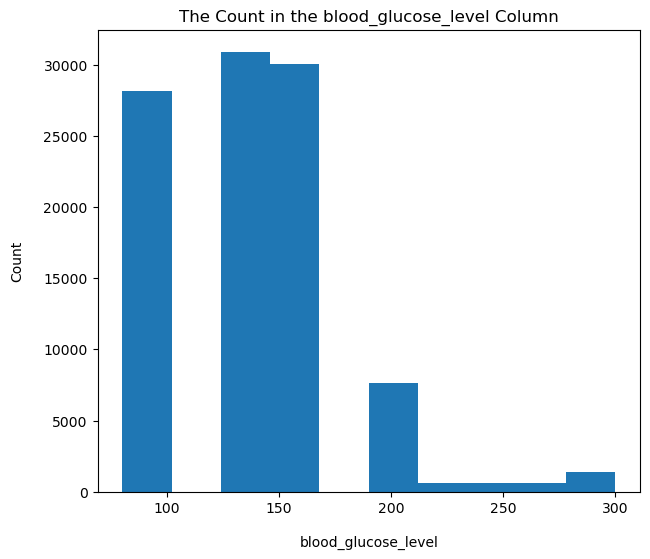

In [28]:
makeHistValueCount(progressDF, 'blood_glucose_level')

---

### Encoding Categorical Data

In [29]:
# Encoding Categorical data
def getLabelList(n):
    labelList =[]
    for i in range(n):
        labelList.append(i)
    return labelList

genderList = ["Female","Male"]

imputedDF = progressDF
imputedDF["gender"] = imputedDF["gender"].replace(genderList, getLabelList(len(genderList)))

imputedDF.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,never,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [30]:

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(imputedDF[['smoking_history']])

encoder.categories_

oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)

oneHotDF.columns = oneHotDF.columns.get_level_values(0)
cleanedDF = pd.concat([imputedDF, oneHotDF], axis=1).drop(columns = "smoking_history")

cleanedDF.head()

c:\Users\brayj\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,1.0,0.0
1,0,54.0,0,0,27.32,6.6,80,0,0.0,0.0,0.0,1.0,0.0
2,1,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,1.0,0.0
3,0,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,0.0
4,1,76.0,1,1,20.14,4.8,155,0,1.0,0.0,0.0,0.0,0.0


---

### Box Plots for Outlier Visualization

In [31]:
# Function to create box plots for each column
def makeBoxPlot(aDF, col):  
    sns.boxplot(aDF[col])
    plt.title(f"Box Plot of {col}")

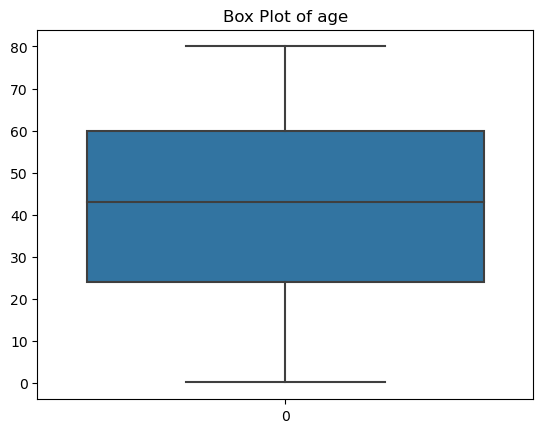

In [32]:
makeBoxPlot(cleanedDF,'age')

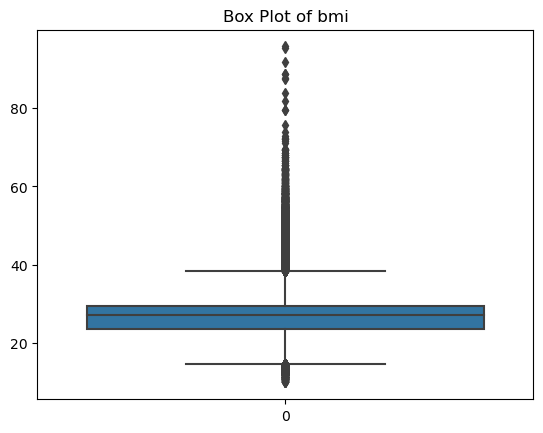

In [33]:
makeBoxPlot(cleanedDF, 'bmi')

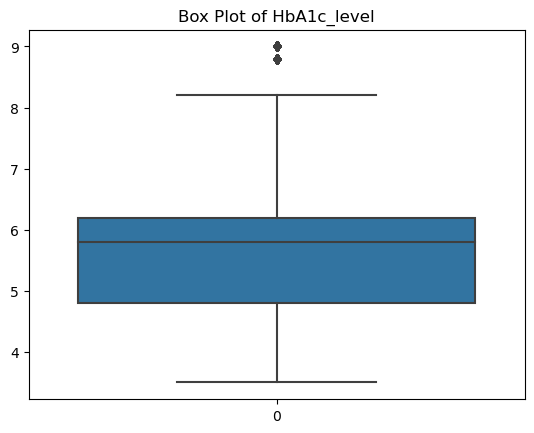

In [34]:
makeBoxPlot(cleanedDF, 'HbA1c_level')

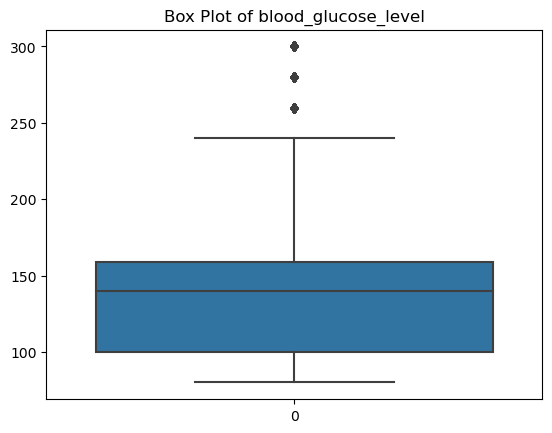

In [35]:
makeBoxPlot(cleanedDF, 'blood_glucose_level')

---

### Correlation Heat Map

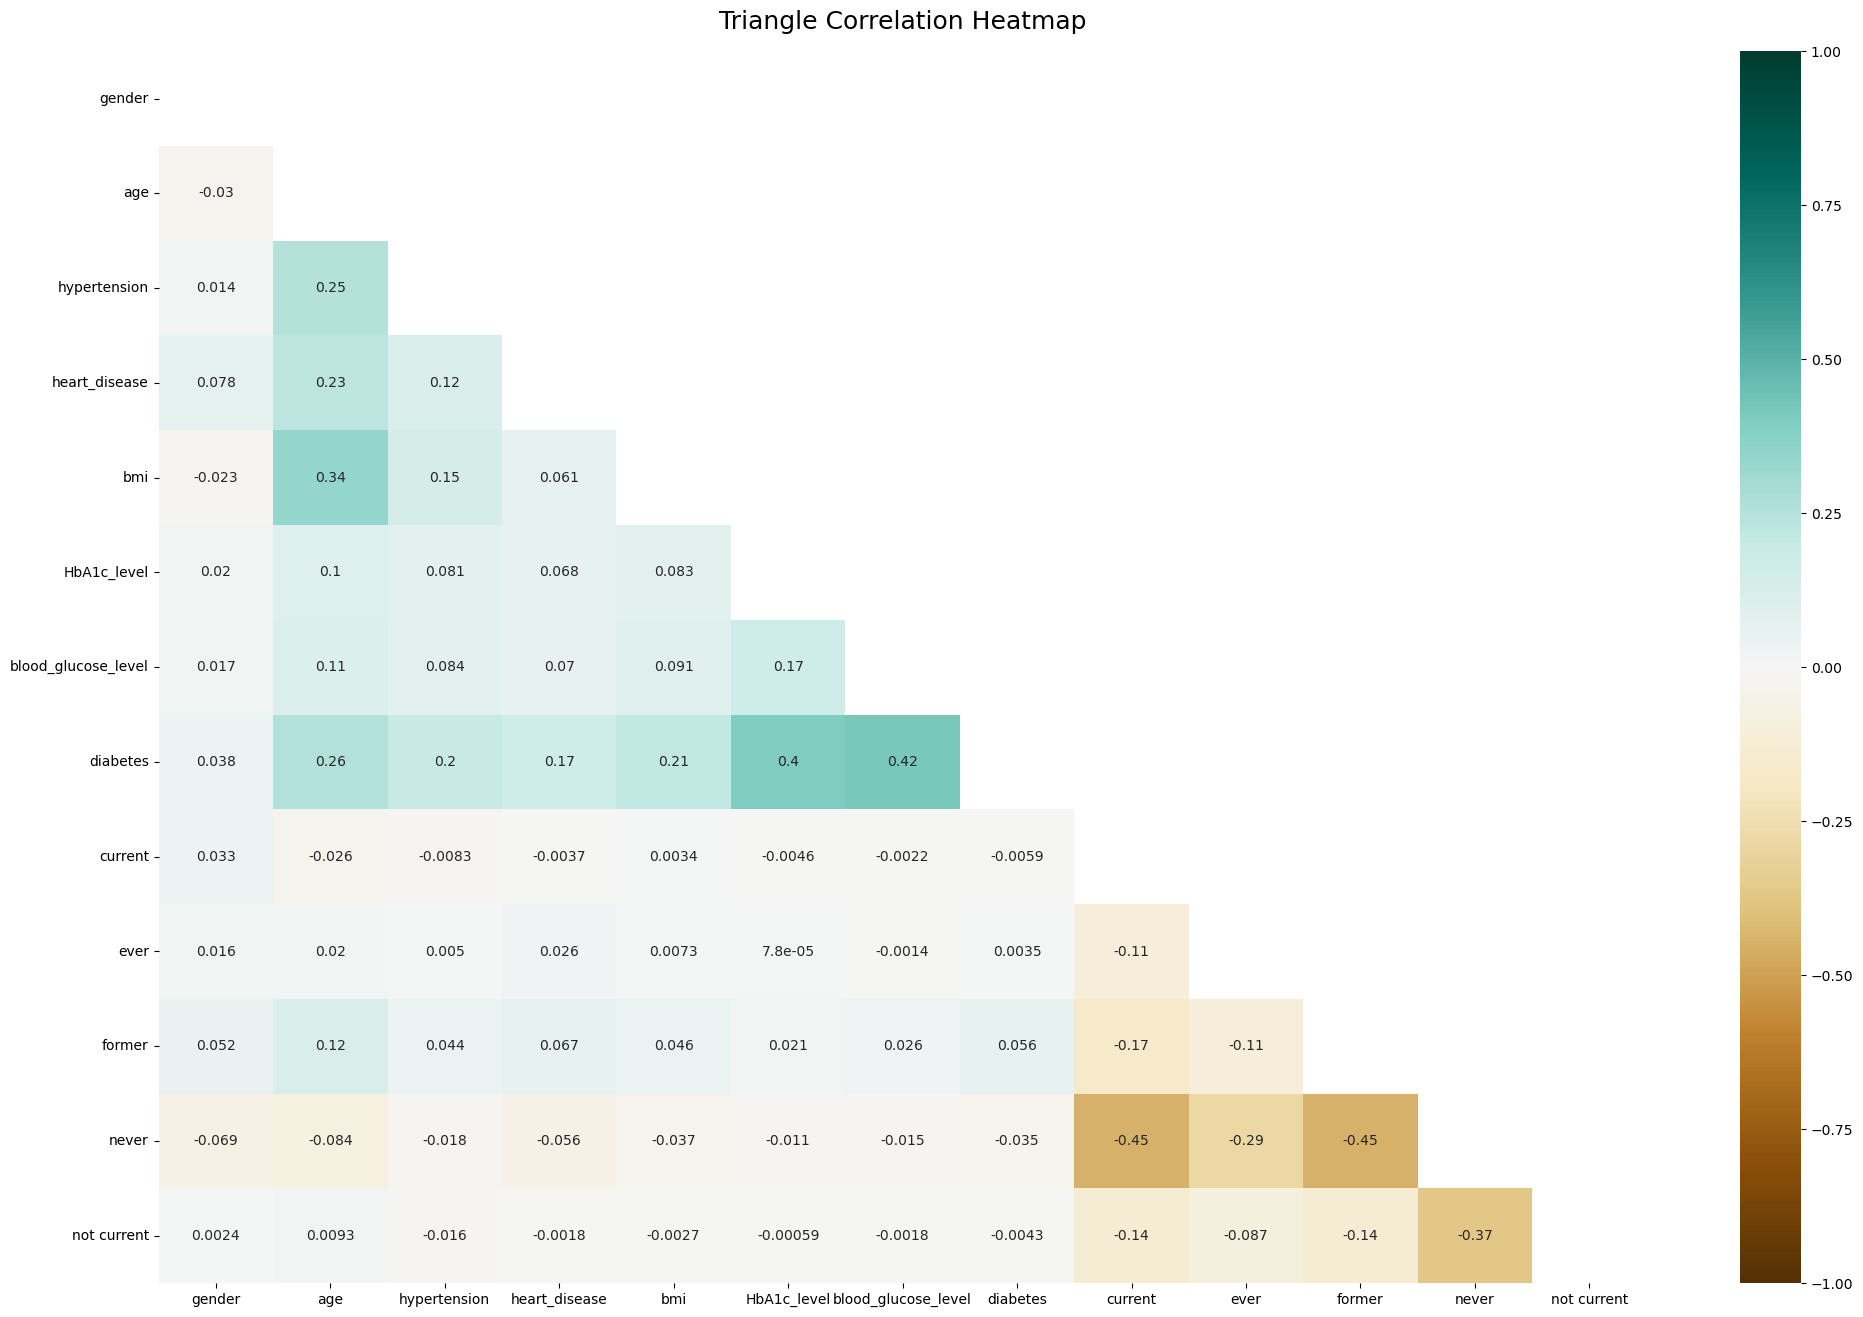

In [36]:
plt.figure(figsize=(24, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(cleanedDF.corr(), dtype=bool))
heatmap = sns.heatmap(cleanedDF.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

---

## Splitting into Training and Testing Sets

In [37]:
yDF = cleanedDF["diabetes"]
xDF = cleanedDF.drop(columns=["diabetes"], axis=1)

print(xDF.columns)
xDF.head()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'current', 'ever', 'former', 'never',
       'not current'],
      dtype='object')


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,current,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140,0.0,0.0,0.0,1.0,0.0
1,0,54.0,0,0,27.32,6.6,80,0.0,0.0,0.0,1.0,0.0
2,1,28.0,0,0,27.32,5.7,158,0.0,0.0,0.0,1.0,0.0
3,0,36.0,0,0,23.45,5.0,155,1.0,0.0,0.0,0.0,0.0
4,1,76.0,1,1,20.14,4.8,155,1.0,0.0,0.0,0.0,0.0


In [38]:
pd.DataFrame(yDF)

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [39]:
xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, yDF, 
    test_size=0.05,
    shuffle = True,
    stratify = yDF)

### Scaling the Training Set

In [40]:
xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])


In [41]:

# Convert the sampled subset back to a DataFrame
sampled_xTrain = pd.DataFrame(xTrain).sample(n=10000, random_state=42)

# Scale the features of the sampled subset
sampled_xTrain_scaled = xScaler.fit_transform(sampled_xTrain)

# Get the corresponding target values
sampled_yTrain = yTrain.loc[sampled_xTrain.index]


---

## Hyper Parameter Optimization

### Logistic Regression

In [42]:
# # Logistic Regression Hyper Param Optimization

# parameters = [{'penalty':['l1','l2'], 
#               'C':[1, 10, 100, 1000]}]
# gridSearch = GridSearchCV(estimator = LogisticRegression(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(sampled_xTrain_scaled, sampled_yTrain) 

# logisticParams = gridSearch.best_params_

# logisticParams

In [43]:
logisticParams = {'C': 1, 'penalty': 'l2'}

### SVC

In [44]:
# # SVC Hyper Param Optimization
# parameters = {'C':[1,10,100,1000],
#               'gamma':[1,0.1,0.001,0.0001], 
#               'kernel':['linear','rbf']}
# gridSearch = GridSearchCV(estimator = SVC(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(sampled_xTrain_scaled, sampled_yTrain) 

# svmParams = gridSearch.best_params_

# svmParams

In [45]:
svmParams = {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

### Neural Network

In [46]:
# # Neural Network Hyper Param Optimization
# parameters = parameter_space = {
#     'max_iter': [1000],
#     'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# gridSearch = GridSearchCV(estimator = MLPClassifier(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(sampled_xTrain_scaled, sampled_yTrain) 

# mlpParams = gridSearch.best_params_

# mlpParams

In [47]:
mlpParams = {'activation': 'relu',
            'alpha': 0.0001,
            'hidden_layer_sizes': (50, 50, 50),
            'learning_rate': 'adaptive',
            'max_iter': 1000,
            'solver': 'adam'}

### Decision Tree

In [48]:
# # Decision Tree Hyper Param Optimization
# parameters = {'criterion': ['gini', 'entropy'],
#               'splitter': ['best', 'random'],
#               'max_depth': [None, 10, 20, 30, 40, 50],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': [None, 'sqrt', 'log2']}

              
# gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(sampled_xTrain_scaled, sampled_yTrain) 

# treeParams = gridSearch.best_params_

# treeParams

In [49]:
treeParams = {'criterion': 'entropy',
                'max_depth': 30,
                'max_features': None,
                'min_samples_leaf': 1,
                'min_samples_split': 2,
                'splitter': 'best'}

### Random Forest

In [50]:
# # Random Forest Hyper Param Optimization
# parameters = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=RandomForestClassifier(), 
#                            param_grid=parameters, 
#                            scoring='recall', 
#                            cv=5,
#                            verbose=1,
#                            n_jobs=-1)

# grid_search.fit(sampled_xTrain_scaled, sampled_yTrain)

# forestParams = grid_search.best_params_

# forestParams


In [51]:
forestParams = {'max_depth': 20,
                'min_samples_leaf': 1,
                'min_samples_split': 2,
                'n_estimators': 100}

### KNN

In [52]:
# # KNN Hyper Param Optimization
# parameters = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }
# grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
#                            param_grid=parameters, 
#                            scoring='recall', 
#                            cv=5,
#                            verbose=1,
#                            n_jobs=-1)

# grid_search.fit(sampled_xTrain_scaled, sampled_yTrain)

# knnParams = grid_search.best_params_

# knnParams


In [53]:
knnParams = {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

---

## Cross Fold Validation                                                                              

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = LogisticRegression(**logisticParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.959421052631579    Recall=0.6123456790123457    FScore=0.7201451905626135
Completed Fold 1
    Accuracy=0.9598421052631579    Recall=0.6237745098039216    FScore=0.7274026438013577
Completed Fold 2
    Accuracy=0.9605789473684211    Recall=0.635474006116208    FScore=0.7350548284400426
Completed Fold 3
    Accuracy=0.9605789473684211    Recall=0.6317119393556538    FScore=0.7275372862859222
Completed Fold 4
    Accuracy=0.9611578947368421    Recall=0.6225582860743542    FScore=0.7280766396462786
Mean accuracy score: 0.9603157894736842
Mean f1 score: 0.7276433177472429
Mean precision score: 0.8704543883200264
Mean recall score: 0.6251728840724966


In [55]:
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = SVC(**svmParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.9702631578947368    Recall=0.6666666666666666    FScore=0.7926605504587155
Completed Fold 1
    Accuracy=0.9704736842105263    Recall=0.6746323529411765    FScore=0.7969598262757872
Completed Fold 2
    Accuracy=0.9723684210526315    Recall=0.691131498470948    FScore=0.8114901256732494
Completed Fold 3
    Accuracy=0.9722631578947368    Recall=0.6866708780795957    FScore=0.8048870788596816
Completed Fold 4
    Accuracy=0.9731578947368421    Recall=0.6950220541902962    FScore=0.8122238586156112
Mean accuracy score: 0.9717052631578946
Mean f1 score: 0.8036442879766088
Mean precision score: 0.9765403494099733
Mean recall score: 0.6828246900697366


In [56]:
from sklearn.tree import DecisionTreeClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = DecisionTreeClassifier(**treeParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.9870526315789474    Recall=0.9141975308641975    FScore=0.9233167082294265
Completed Fold 1
    Accuracy=0.9867368421052631    Recall=0.9160539215686274    FScore=0.9222702035780382
Completed Fold 2
    Accuracy=0.9867368421052631    Recall=0.9143730886850153    FScore=0.9222702035780382
Completed Fold 3
    Accuracy=0.9874736842105263    Recall=0.917877447883765    FScore=0.9243002544529262
Completed Fold 4
    Accuracy=0.9885263157894737    Recall=0.9193446754883428    FScore=0.930484693877551
Mean accuracy score: 0.9873052631578947
Mean f1 score: 0.924528412743196
Mean precision score: 0.9328415143331531
Mean recall score: 0.9163693328979896


In [57]:
from sklearn.neural_network import MLPClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = MLPClassifier(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.975    Recall=0.7574074074074074    FScore=0.8378286104472517
Completed Fold 1
    Accuracy=0.9756315789473684    Recall=0.7536764705882353    FScore=0.8416010947656517
Completed Fold 2
    Accuracy=0.9768947368421053    Recall=0.7718654434250765    FScore=0.8518393520081
Completed Fold 3
    Accuracy=0.9773157894736842    Recall=0.8035375868603917    FScore=0.8551260504201681
Completed Fold 4
    Accuracy=0.9798421052631578    Recall=0.8059231253938248    FScore=0.8697721863311798
Mean accuracy score: 0.9769368421052631
Mean f1 score: 0.8512334587944703
Mean precision score: 0.9397618885427326
Mean recall score: 0.7784820067349871


In [58]:
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = RandomForestClassifier(**forestParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the validation data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)


Completed Fold 0
    Accuracy=0.9847368421052631    Recall=0.825925925925926    FScore=0.9022252191503709
Completed Fold 1
    Accuracy=0.9853684210526316    Recall=0.8345588235294118    FScore=0.9073950699533645
Completed Fold 2
    Accuracy=0.9858947368421053    Recall=0.8397553516819571    FScore=0.9110816191108162
Completed Fold 3
    Accuracy=0.9852105263157894    Recall=0.8269109286165508    FScore=0.9030700241462574
Completed Fold 4
    Accuracy=0.9860526315789474    Recall=0.8393194706994329    FScore=0.909525435302151
Mean accuracy score: 0.9854526315789475
Mean f1 score: 0.9066594735325919
Mean precision score: 0.9942190709604786
Mean recall score: 0.8332941000906556


In [59]:
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = KNeighborsClassifier(**knnParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the validation data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)


Completed Fold 0
    Accuracy=0.988421052631579    Recall=0.9067901234567901    FScore=0.9303356554781507
Completed Fold 1
    Accuracy=0.9880526315789474    Recall=0.9025735294117647    FScore=0.9284588717302238
Completed Fold 2
    Accuracy=0.9889473684210527    Recall=0.908256880733945    FScore=0.9339622641509433
Completed Fold 3
    Accuracy=0.9888947368421053    Recall=0.903348073278585    FScore=0.9312927385216542
Completed Fold 4
    Accuracy=0.9901052631578947    Recall=0.9130434782608695    FScore=0.9390797148412183
Mean accuracy score: 0.9888842105263158
Mean f1 score: 0.9326258489444379
Mean precision score: 0.9599680668731587
Mean recall score: 0.9068024170283907


---

## Model Scores


Logistic Regression

- Mean accuracy score: 0.9602421052631579
- Mean f1 score: 0.72728593314523
- Mean precision score: 0.8688202734173156
- Mean recall score: 0.6255267631572516

SVC

- Mean accuracy score: 0.9715789473684211
- Mean f1 score: 0.8025831352536837
- Mean precision score: 0.9760629636661617
- Mean recall score: 0.6815458075431081

Decision Tree

- Mean accuracy score: 0.9869894736842106
- Mean f1 score: 0.9222859969936833
- Mean precision score: 0.9342861518880639
- Mean recall score: 0.9105964274933827

Neural Network

- Mean accuracy score: 0.9760421052631578
- Mean f1 score: 0.8462463243220334
- Mean precision score: 0.928287545703838
- Mean recall score: 0.7782451821848942

Random Forest

- Mean accuracy score: 0.9851157894736842
- Mean f1 score: 0.9044399879797703
- Mean precision score: 0.9924583218659164
- Mean recall score: 0.8307880478756345

  KNN
- Mean accuracy score: 0.988642105263158
- Mean f1 score: 0.9308631279127815
- Mean precision score: 0.9616156810439289
- Mean recall score: 0.9020329334056487

---

## Retraining Best Models

In [60]:
### feature scaling
xScaler = StandardScaler()
xColNames = xLocalTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
# apply the scaling to the testing set
xTestScaled = xScaler.transform(xTest[xColNames])

In [61]:
# K-NN

clf = KNeighborsClassifier(**knnParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

nnAccuracy = accuracy_score(yTest, preds)
nnFScore = f1_score(yTest, preds)
nnPrecision = precision_score(yTest, preds)
nnRecall = recall_score(yTest, preds)


# Random Forest
clf = RandomForestClassifier(**forestParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

rfAccuracy = accuracy_score(yTest, preds)
rfFScore = f1_score(yTest, preds)
rfPrecision = precision_score(yTest, preds)
rfRecall = recall_score(yTest, preds)

# Decision Tree 
clf = DecisionTreeClassifier(**treeParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

dtAccuracy = accuracy_score(yTest, preds)
dtFScore = f1_score(yTest, preds)
dtPrecision = precision_score(yTest, preds)
dtRecall = recall_score(yTest, preds)
scoreDict = {"model" : ["K-NN", "Random Forest","Decision Tree"],
            "accuracy" : [nnAccuracy, rfAccuracy, dtAccuracy],
            "fScore" : [nnFScore, rfFScore, dtFScore],
            "precision" : [nnPrecision, rfPrecision, dtPrecision],
            "recall" : [nnRecall, rfRecall, dtRecall]}

resultsDF = pd.DataFrame.from_dict(scoreDict)

resultsDF

,model,accuracy,fScore,precision,recall
0,K-NN,0.9558,0.701754,0.822785,0.611765
1,Random Forest,0.9698,0.787623,0.979021,0.658824
2,Decision Tree,0.9540,0.726841,0.733813,0.720000


In [64]:
# Prediction of Type 2 Diabetes using Machine Learning Article
paper1Dict = {"model" : ["Decision Tree", "Random Forest"],
            "accuracy" : [0.840, 0.941],
            "fScore" : [0.891, 0.959],
            "precision" : [0.912, 0.976]}
paper1DF = pd.DataFrame.from_dict(paper1Dict)
paper1DF


,model,accuracy,fScore,precision
0,Decision Tree,0.840,0.891,0.912
1,Random Forest,0.941,0.959,0.976


In [66]:
# A data driven approach to predicting diabetes with machine learning
paper2Dict = {"model" : [ "Random Forest"],
            "accuracy" : [0.937],
            "fScore" : [0.86],
            "precision" : [0.86],
            "recall":[0.86]}
paper2DF = pd.DataFrame.from_dict(paper2Dict)
paper2DF


,model,accuracy,fScore,precision,recall
0,Random Forest,0.937,0.86,0.86,0.86


In [67]:
# Diabetes prediction using machine learning techniques.

paper3Dict = {"model" :["K-NN","Decision Tree","Random Forest"],
            "acurracy": [0.7,0.78,0.8]}
paper3DF = pd.DataFrame.from_dict(paper3Dict)
paper3DF

,model,acurracy
0,K-NN,0.70
1,Decision Tree,0.78
2,Random Forest,0.80
